# GRIP : The Sparks Foundation

# Data Science and Business Analytics internship

# Author : M.B.Sanju Vikasini

# TASK 6 : Decision Tree algorithm

Create decision tree classifer and viualize it graphically

# Import the packages

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1 : Import the dataset

In [25]:
df = pd.read_csv("Iris.csv")
df = df.drop(columns = "Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# STEP 2 : Visualization of data

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

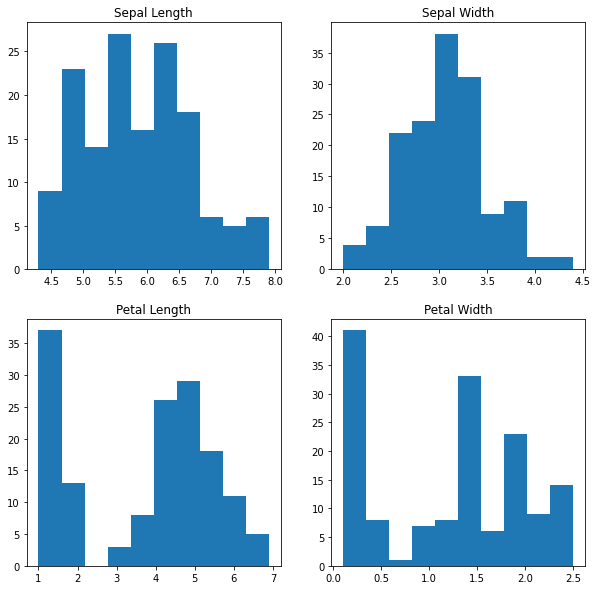

In [44]:
#Histogram

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.title("Sepal Length")
plt.hist(df["SepalLengthCm"])
plt.subplot(2,2,2)
plt.title("Sepal Width")
plt.hist(df["SepalWidthCm"])
plt.subplot(2,2,3)
plt.title("Petal Length")
plt.hist(df["PetalLengthCm"])
plt.subplot(2,2,4)
plt.title("Petal Width")
plt.hist(df["PetalWidthCm"])



<AxesSubplot:>

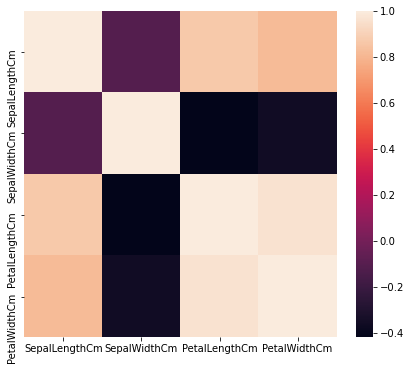

In [33]:
#Heatmap construction using correlation matrix
plt.figure(figsize = (7,6))
sns.heatmap(df.corr())

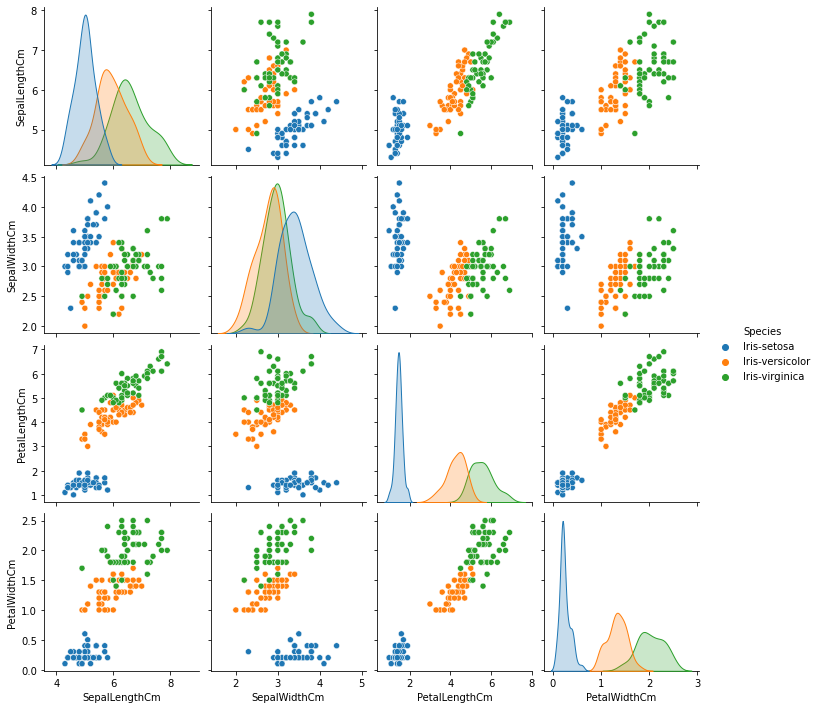

In [34]:
#Pairplot - Bivariate analysis
sns.pairplot(df,hue = "Species")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

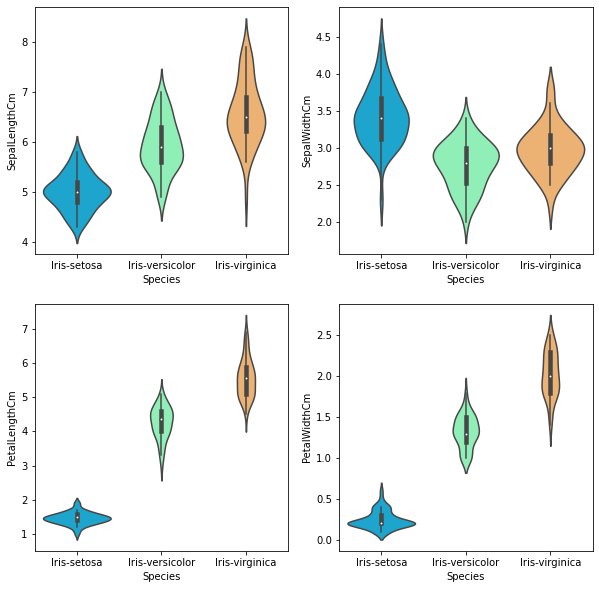

In [43]:
#Violin plot
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x = "Species",y = "SepalLengthCm",data = df, palette = "rainbow")
plt.subplot(2,2,2)
sns.violinplot(x = "Species",y = "SepalWidthCm",data = df, palette = "rainbow")
plt.subplot(2,2,3)
sns.violinplot(x = "Species",y = "PetalLengthCm",data = df, palette = "rainbow")
plt.subplot(2,2,4)
sns.violinplot(x = "Species",y = "PetalWidthCm",data = df, palette = "rainbow")

# STEP 3 : Data preparation

In [45]:
X = df.drop(["Species"],axis = 1)
Y = df["Species"]

In [46]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [74]:
#Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [75]:
X_train.shape

(120, 4)

In [76]:
X_test.shape

(30, 4)

In [77]:
Y_train.shape

(120,)

In [78]:
Y_test.shape

(30,)

# STEP 4 : Training the model

In [88]:
from sklearn.tree import DecisionTreeClassifier
destree = DecisionTreeClassifier()
destree = destree.fit(X_train,Y_train)

In [89]:
pred = tree.predict(X_test)

In [90]:
df1 = pd.DataFrame({"Actual" : Y_test,"Predicted" : pred})
df1.head()

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


# STEP 5 : Visualization of Decision Tree

[Text(418.5, 498.3, 'X[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(128.76923076923077, 226.5, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(450.69230769230774, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.2

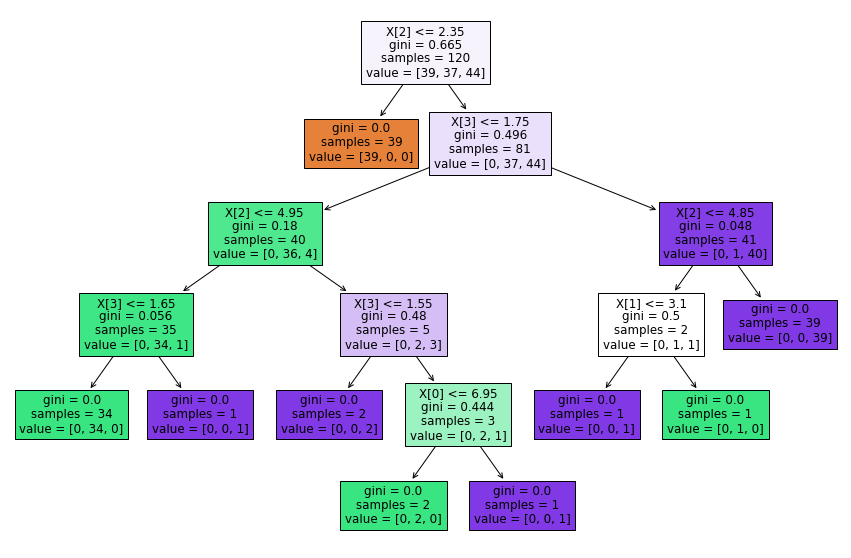

In [92]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(destree, filled=True)

In [95]:
print(tree.export_text(destree) )

|--- feature_2 <= 2.35
|   |--- class: Iris-setosa
|--- feature_2 >  2.35
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica

